<a href="https://colab.research.google.com/github/vishwanaik15/DMASSIGNMENT02/blob/main/Naik_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:Naik Vishwa chetankumar                                                     
UTA ID:1001871311                                                                
CSE-5334-002 Data Mining                                                         
Assignment 02**

**Task:The goal of this assignment is to learn about the concept of overfitting using the Higher order linear regression.**

**Importing required dependencies**


In [52]:
import operator
from math import *
import random
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**A.Generate 20 data pairs (X, Y) using y = sin(2*pi*X) + 0.1 * N**


*   Use uniform distribution between 0 and 1 for X
*   Sample N from the normal gaussian distribution 



In [53]:
X=[]
Y=[]
data =[]
mu, sigma = 0,1
for i in range(20):
    X1 = random.uniform(0,1)    
    N = np.random.normal(mu,sigma)
    Y1 = sin(2*pi*X1) + 0.1* N
    X = np.append(X,X1)
    Y = np.append(Y,Y1)
data = np.column_stack((X,Y)) 
#column_stack is used to make 2D array from two 1D arrays
print("Datapoints are:")
print(data)

Datapoints are:
[[ 0.638062   -0.79310299]
 [ 0.81977575 -0.8475297 ]
 [ 0.48337574  0.06102277]
 [ 0.94313257 -0.42628778]
 [ 0.90889489 -0.55430009]
 [ 0.21272437  1.02827996]
 [ 0.67634722 -0.85987455]
 [ 0.84172784 -0.7756398 ]
 [ 0.1417325   0.84911519]
 [ 0.63899416 -0.79429692]
 [ 0.04330481  0.17930308]
 [ 0.09228171  0.57805748]
 [ 0.67559578 -0.71054967]
 [ 0.96356735 -0.27880002]
 [ 0.13657311  0.77763568]
 [ 0.1257535   0.80702802]
 [ 0.9256638  -0.69054499]
 [ 0.05237995  0.3791138 ]
 [ 0.3799448   0.7186206 ]
 [ 0.77543176 -0.99502587]]


**Use 10 for train and 10 for test**



In [54]:
#splitting data into two equal parts: train and test both having 10 pairs
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.5)

In [55]:
print(X_train)

[[ 0.96356735 -0.27880002]
 [ 0.09228171  0.57805748]
 [ 0.94313257 -0.42628778]
 [ 0.13657311  0.77763568]
 [ 0.21272437  1.02827996]
 [ 0.84172784 -0.7756398 ]
 [ 0.638062   -0.79310299]
 [ 0.1257535   0.80702802]
 [ 0.9256638  -0.69054499]
 [ 0.3799448   0.7186206 ]]


In [56]:
X_train = X_train[:,0].reshape(-1,1) 
#reshape is used to make array in column-wise
print(X_train)

[[0.96356735]
 [0.09228171]
 [0.94313257]
 [0.13657311]
 [0.21272437]
 [0.84172784]
 [0.638062  ]
 [0.1257535 ]
 [0.9256638 ]
 [0.3799448 ]]


In [57]:
print(X_test)

[[ 0.81977575 -0.8475297 ]
 [ 0.05237995  0.3791138 ]
 [ 0.48337574  0.06102277]
 [ 0.04330481  0.17930308]
 [ 0.63899416 -0.79429692]
 [ 0.67559578 -0.71054967]
 [ 0.77543176 -0.99502587]
 [ 0.1417325   0.84911519]
 [ 0.90889489 -0.55430009]
 [ 0.67634722 -0.85987455]]


In [58]:
X_test = X_test[:,0].reshape(-1,1)
print(X_test)

[[0.81977575]
 [0.05237995]
 [0.48337574]
 [0.04330481]
 [0.63899416]
 [0.67559578]
 [0.77543176]
 [0.1417325 ]
 [0.90889489]
 [0.67634722]]


In [59]:
Y_train = Y_train.reshape(-1,1)
print(Y_train)

[[-0.27880002]
 [ 0.57805748]
 [-0.42628778]
 [ 0.77763568]
 [ 1.02827996]
 [-0.7756398 ]
 [-0.79310299]
 [ 0.80702802]
 [-0.69054499]
 [ 0.7186206 ]]


In [60]:
Y_test = Y_test.reshape(-1,1)
print(Y_test)

[[-0.8475297 ]
 [ 0.3791138 ]
 [ 0.06102277]
 [ 0.17930308]
 [-0.79429692]
 [-0.71054967]
 [-0.99502587]
 [ 0.84911519]
 [-0.55430009]
 [-0.85987455]]


In [61]:
# importing some more dependencies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import math

<b>B.Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9
</b>

In [62]:
#np.polyfit is used to print and calculate weights of polynomial regression
print("Weights of polynomial regression of order 0 are: \n", np.polyfit(X_train[:,0],Y_train[:,0],0).reshape(-1,1))
print("\nWeights of polynomial regression of order 1 are: \n", np.polyfit(X_train[:,0],Y_train[:,0],1).reshape(-1,1))
print("\nWeights of polynomial regression of order 3 are: \n", np.polyfit(X_train[:,0],Y_train[:,0],3).reshape(-1,1))
print("\nWeights of polynomial regression of order 9 are: \n", np.polyfit(X_train[:,0],Y_train[:,0],9).reshape(-1,1))

Weights of polynomial regression of order 0 are: 
 [[0.09452462]]

Weights of polynomial regression of order 1 are: 
 [[-1.76084673]
 [ 1.02062981]]

Weights of polynomial regression of order 3 are: 
 [[ 23.7748249 ]
 [-36.28794802]
 [ 12.94575625]
 [ -0.32403901]]

Weights of polynomial regression of order 9 are: 
 [[-4.43214536e+03]
 [-1.87797164e+04]
 [ 1.25615154e+05]
 [-2.43990201e+05]
 [ 2.35665207e+05]
 [-1.26925804e+05]
 [ 3.88797471e+04]
 [-6.58213686e+03]
 [ 5.66567125e+02]
 [-1.84357401e+01]]


<b>C.Display weights in table </b>

In [63]:
print("Table of weights")
table = {'M=0': np.polyfit(X_train[:,0],Y_train[:,0],0), 
         'M=1': np.polyfit(X_train[:,0],Y_train[:,0],1),
         'M=3': np.polyfit(X_train[:,0],Y_train[:,0],3),
         'M=9': np.polyfit(X_train[:,0],Y_train[:,0],9),
        }
pd.DataFrame({ key:pd.Series(value) for key, value in table.items() })

Table of weights


,M=0,M=1,M=3,M=9
0,0.094525,-1.760847,23.774825,-4432.145359
1,NaN,1.020630,-36.287948,-18779.716362
2,NaN,NaN,12.945756,125615.154103
3,NaN,NaN,-0.324039,-243990.200535
4,NaN,NaN,NaN,235665.206874
5,NaN,NaN,NaN,-126925.803872
6,NaN,NaN,NaN,38879.747090
7,NaN,NaN,NaN,-6582.136865
8,NaN,NaN,NaN,566.567125
9,NaN,NaN,NaN,-18.435740


<b>D. Draw a chart of fit data
</b>

In [64]:
#sorted X and Y data simultaneously to get proper line graph ouput 
X_train, Y_train = zip(*sorted(zip(X_train, Y_train)))

Chartes for different degrees:
Chart for degree = 0


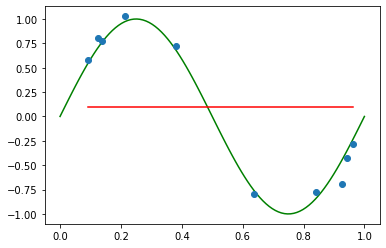

------------------------------------------------------------
Chart for degree = 1


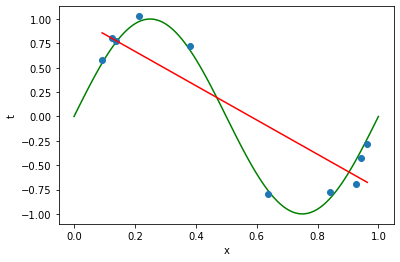

------------------------------------------------------------
Chart for degree = 2


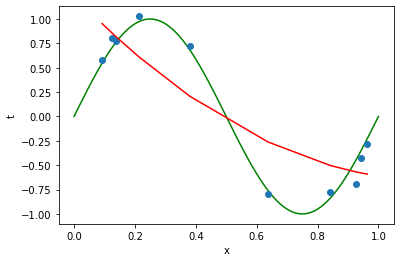

------------------------------------------------------------
Chart for degree = 3


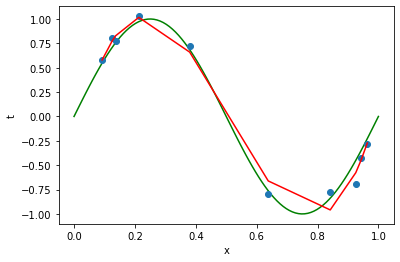

------------------------------------------------------------
Chart for degree = 4


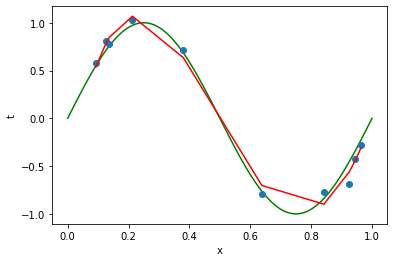

------------------------------------------------------------
Chart for degree = 5


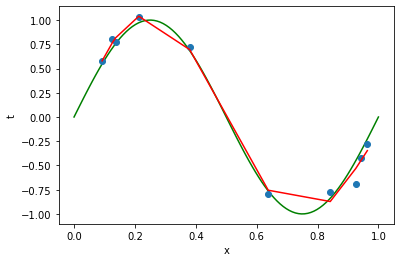

------------------------------------------------------------
Chart for degree = 6


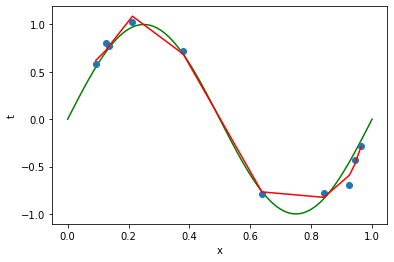

------------------------------------------------------------
Chart for degree = 7


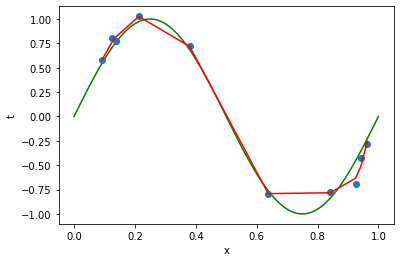

------------------------------------------------------------
Chart for degree = 8


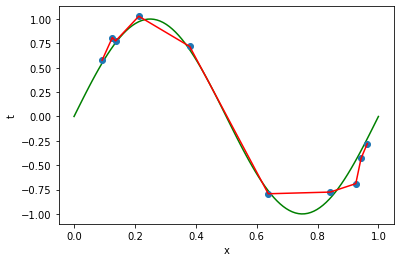

------------------------------------------------------------
Chart for degree = 9


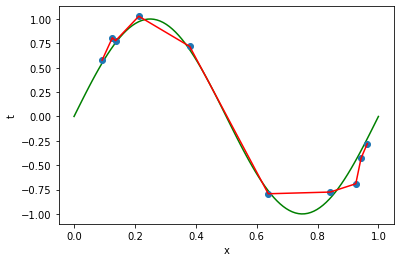

------------------------------------------------------------


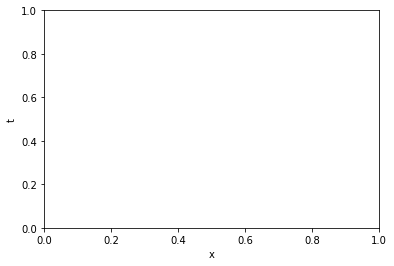

In [65]:
print("Chartes for different degrees:")
for i in range(10):
    print('Chart for degree = %d' %(i))
    #using original sine curve to get some reference that how much our curve fits
    x = np.linspace(0, 1, 100)
    y = np.sin(2*pi*x)
    plt.plot(x,y,color='g') 
    
    #furthur we will generate polynomial features for given degrees (0 - 9)
    poly_features=PolynomialFeatures(degree=i)
    #fits training data for given degree and transform it to X_poly
    X_poly=poly_features.fit_transform(X_train)
    
    model=LinearRegression()
    #fit linear regression model for given X and Y data
    model.fit(X_poly,Y_train) 
    plt.plot(X_train,Y_train,'o')
    plt.plot(X_train,model.predict(X_poly), color='r')
    plt.show()
    plt.xlabel('x') #x-label
    plt.ylabel('t') #y-label
    print("-"*60)

<b>E.Draw train error vs test error</b>

In [66]:
rmse_train=[]
rmse_test=[]

#i used for loop to get 
for i in range(10):
    poly_features = PolynomialFeatures(degree=i)
    X_poly=poly_features.fit_transform(X_train)
    model=LinearRegression()
    model.fit(X_poly,Y_train) 
    rmse = sqrt(mean_squared_error(Y_train, model.predict(poly_features.fit_transform(X_train))))
    rmse_train.append(rmse)
    
    X_poly=poly_features.fit_transform(X_test)
    rmset = sqrt(mean_squared_error(Y_test, model.predict(poly_features.fit_transform(X_test))))
    rmse_test.append(rmset)

In [67]:
print(rmse_train)

[0.7100366677550262, 0.33830189081876655, 0.3269965371845885, 0.0844109264306226, 0.07639915914897327, 0.06718197539427183, 0.053164782364990566, 0.03593461646423514, 0.00138216108215769, 2.0567687467096913e-11]


In [68]:
print(rmse_test)

[0.7418418904958812, 0.5247137250538546, 0.501585813106742, 0.09508054260793203, 0.11864350800335662, 0.0734484044671494, 0.21170243390252305, 0.10405249911275444, 1.7173837084565273, 1.616626680663811]


Graph for Train error vs Test error


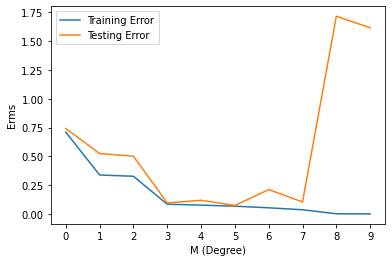

In [69]:
print("Graph for Train error vs Test error")
degree = ['0','1','2','3','4','5','6','7','8','9']

#using fig method to use egend method and plot the chart
fig,ax = plt.subplots()
ax.plot(degree, rmse_train, label = 'Training Error')
ax.plot(degree, rmse_test, label = 'Testing Error')
leg = ax.legend()
plt.xlabel('M (Degree)')
plt.ylabel('Erms')
plt.show()

<b>F.Now generate 100 more data and fit 9th order model and draw fit.
</b>

In [25]:
mu,sigma = 0,1
X = []
Y = []
for i in range(100):
    X1 = random.uniform(0,1)
    N = np.random.normal(mu,sigma)
    Y1 = sin(2*pi*X1) + N
    X = np.append(X,X1)
    Y = np.append(Y,Y1)
new_data = np.column_stack((X,Y))

In [26]:
X = new_data[:,0].reshape(-1,1)
Y = new_data[:,1].reshape(-1,1)

In [27]:
X,Y = zip(*sorted(zip(X, Y)))

Draw Fit


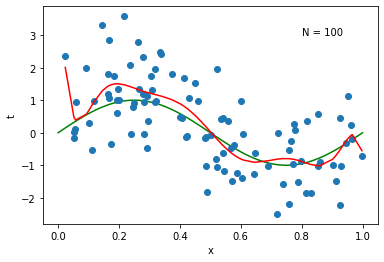

In [28]:
print("Draw Fit")
x = np.linspace(0, 1, 100) 
y = np.sin(2*pi*x)  
plt.plot(x,y,color='g') 

poly_features=PolynomialFeatures(9)
X_poly=poly_features.fit_transform(X)
model=LinearRegression()
model.fit(X_poly,Y) 
plt.plot(X,Y,'o')
plt.plot(X,model.predict(X_poly), color='r') #predicting Y value from X value and then plot it

plt.text(0.8, 3,'N = 100')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<b>Selected 20 data and fit 9th order model and draw fit</b>

In [29]:
X20 = new_data[:20,0].reshape(-1,1)
Y20 = new_data[:20,1].reshape(-1,1)
X20,Y20 = zip(*sorted(zip(X20, Y20)))

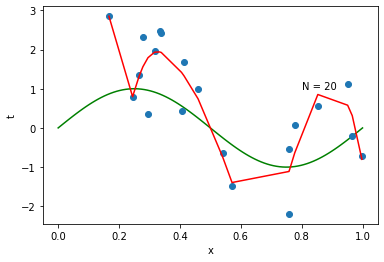

In [30]:
x = np.linspace(0, 1, 100) 
y = np.sin(2*pi*x)  
plt.plot(x,y,color='g') 

poly_features=PolynomialFeatures(9)
X_poly=poly_features.fit_transform(X20)
model=LinearRegression()

model.fit(X_poly,Y20) 
plt.plot(X20,Y20,'o')
plt.plot(X20,model.predict(X_poly), color='r')

plt.text(0.8,1,'N = 20')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<b>G.Now we will regularize using the sum of weights.</b></br>
<b>H.Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 </b>

In [31]:
lamda = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
train_error_for_lamda = []
test_error_for_lamda = []

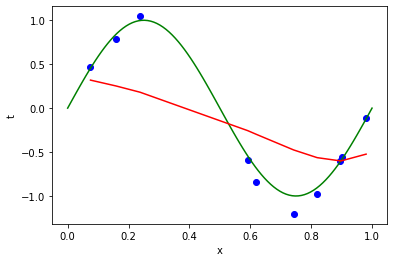

------------------------------------------------------------


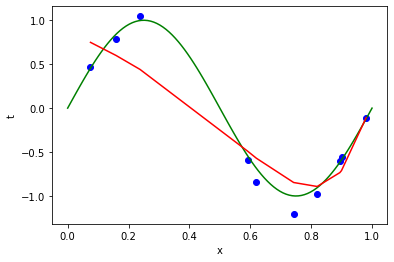

------------------------------------------------------------


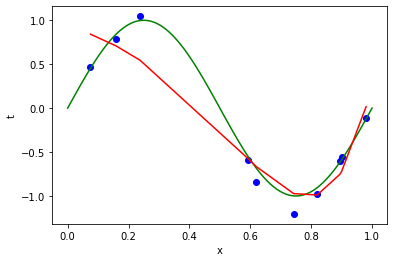

------------------------------------------------------------


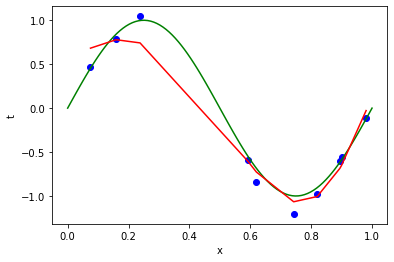

------------------------------------------------------------


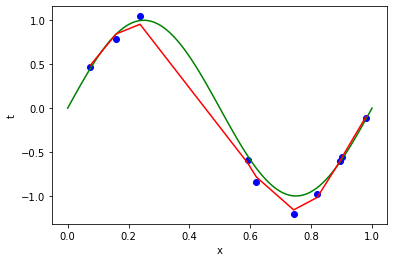

------------------------------------------------------------


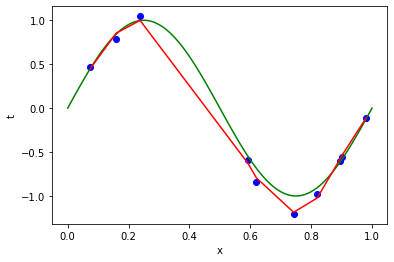

------------------------------------------------------------


In [32]:
for i in lamda:
    x = np.linspace(0, 1, 100)
    y = np.sin(2*pi*x)
    plt.plot(x,y,color='g')
    
    poly_features = PolynomialFeatures(9)
    X_poly = poly_features.fit_transform(X_train)
    poly_features.fit(X_poly,Y_train) 
    reg = linear_model.Ridge(alpha = i) #taking lamda values in alpha and then fit ridge model
    reg.fit(X_poly, Y_train)
    
    Y_pred = reg.predict(poly_features.fit_transform(X_train)) #predict values of Y from X
    
    plt.scatter(X_train, Y_train, color = 'blue')
    plt.plot(X_train, Y_pred, color = 'red')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
    print("-"*60)
    
    #taking two arrays and store both training and testing errors in it
    rmse = sqrt(mean_squared_error(Y_train, reg.predict(poly_features.fit_transform(X_train))))
    train_error_for_lamda.append(rmse)
    rmse = sqrt(mean_squared_error(Y_test, reg.predict(poly_features.fit_transform(X_test))))
    test_error_for_lamda.append(rmse)

In [33]:
print(train_error_for_lamda)

[0.48407848801093756, 0.2721627753429661, 0.2338109211055699, 0.13916185225867422, 0.04577483208669792, 0.03665390882796251]


In [34]:
print(test_error_for_lamda)

[0.3633896641719964, 0.332544911993019, 0.33609647081165955, 0.20534459661541968, 0.11837206356403379, 0.12517059877167522]


Graph for test and train error according to lamda: 


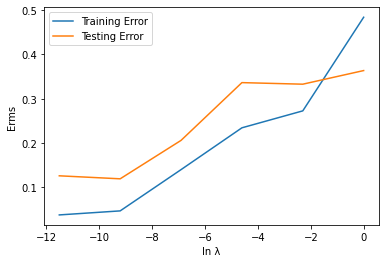

In [35]:
print("Graph for test and train error according to lamda: ")
fig,ax = plt.subplots()
ax.plot(np.log(lamda),train_error_for_lamda, label="Training Error")
ax.plot(np.log(lamda),test_error_for_lamda, label="Testing Error")
leg = ax.legend()
plt.xlabel('ln λ')
plt.ylabel('Erms')
plt.show()

<b>J.Based on the best test performance, what is your model? </b>

From given model of X_test and Y_test and given 0, 1, 3, 9 degrees, I can conclude that for <b>Degree = 3</b>, model gives best performance of all.